# [Explanation] Role of the Number of Steps \(N\) in the Metropolis-Hastings Algorithm

The number of steps \(N\) in the Metropolis-Hastings algorithm plays a crucial role in ensuring the convergence of the Markov chain to its stationary distribution. The main reasons why a large \(N\) is preferable are the following:

1. **Convergence to Stationary Distribution**:
   The Markov chain needs a large number of steps to reach its stationary distribution from an arbitrary initial state. This ensures that the samples generated by the algorithm are representative of the desired distribution.

2. **Exploration of the State Space**:
   A larger \(N\) allows the Markov chain to explore more of the state space, helping to avoid local minima and increasing the chances of finding the global optimum.

3. **Reducing Initial Bias**:
   The initial steps of the Markov chain are heavily influenced by the starting state. By running the chain for a large number of steps, the influence of the initial state diminishes, leading to more reliable samples from the stationary distribution.

4. **Accuracy of Estimates**:
   When using the Metropolis-Hastings algorithm to estimate quantities such as the expected minimal cost, a larger \(N\) provides more samples, which improves the accuracy of statistical estimates.

In summary, a large \(N\) is needed to ensure that the Markov chain converges to its stationary distribution, adequately explores the state space, reduces the bias from the initial state, and provides accurate estimates of the quantities of interest.

# [Explanation] Relationship between Beta and the Acceptance Probability

The relationship between $\beta$ and the acceptance probability of the proposed permutation can be shown by the following equation: 
$$
P(\sigma_t = \sigma') = \min \left\{ 1, \frac{e^{-\beta A_n(\sigma')}}{e^{-\beta A_n(\sigma_{t-1})}} \right\}
$$
This acceptance probability depends on the ratio of $e^{-\beta A_n(\sigma')}$ to $e^{-\beta A_n(\sigma_{t-1})}$.


In order to understand better this relationship, we are going to plot it by following the steps below:

1. **Fix a Current State**: Assume a fixed current state $\sigma_{t-1}$ with a cost $A_n(\sigma_{t-1})$. This defines a specific point on the x-axis of the graph.

2. **Compare New State Costs**: For a proposed new state $\sigma'$ with a different cost $A_n(\sigma')$, compare the value of $e^{-\beta A_n(\sigma')}$ to $e^{-\beta A_n(\sigma_{t-1})}$.

3. **Acceptance Probability**:
    - If $A_n(\sigma') \leq A_n(\sigma_{t-1})$, the acceptance probability is 1 (since the ratio will be greater than or equal to 1).
    - If $A_n(\sigma') > A_n(\sigma_{t-1})$, the acceptance probability is given by $e^{-\beta (A_n(\sigma') - A_n(\sigma_{t-1}))}$.


# [Graph] Relationship between Beta and the Acceptance Probability

We choose a specific $A_n(\sigma_{t-1})$ and plot how the acceptance probability changes for different proposed $A_n(\sigma')$ values for each $\beta$. Each proposed state is going to have an overall higher cost compared to the fixed one. 

In this particular case, $A_n(\sigma_{t-1}) = 5$.

We analyze four different scenarios, each characterized by a different $\beta$:
- $\beta = 0.5$
- $\beta = 1$
- $\beta = 2$
- $\beta = 5$

To highlight the differences between the various scenarios, we add a horizontal line representing the fixed $A_n(\sigma_{t-1})$ and plot vertical lines to show the acceptance probability for the range of $\beta$ values.

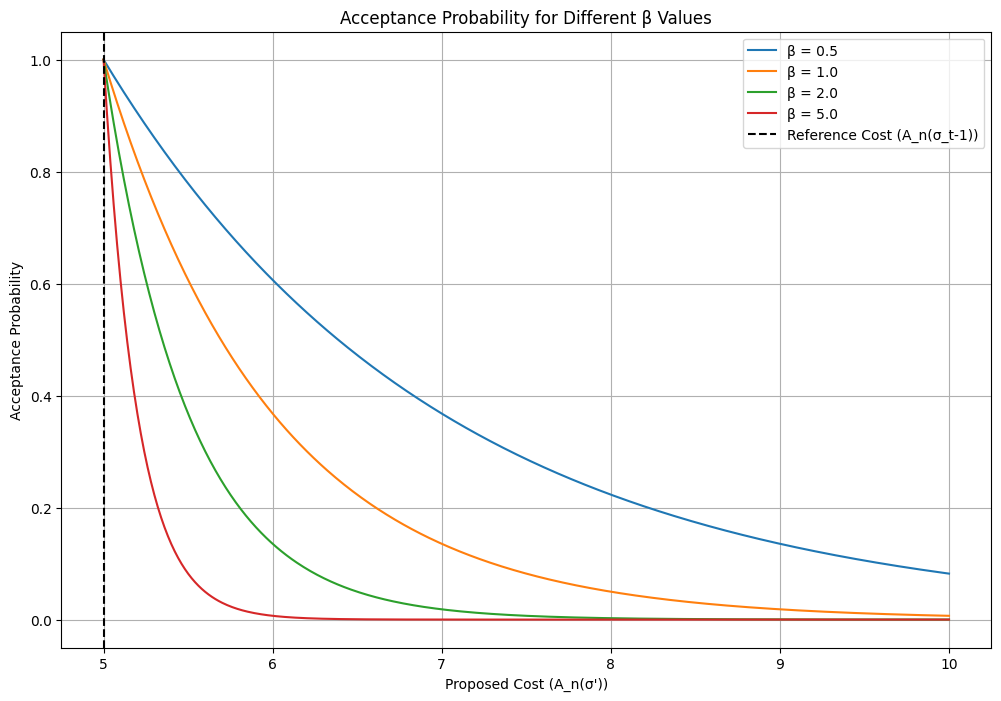

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta_values = [0.5, 1.0, 2.0, 5.0]

# We define a range for the proposed cost values HIGHER than the reference cost.
reference_cost = 5
proposed_costs = np.linspace(5, 10, 500) # np.linspace (start, stop, num)
                                         # Thanks to this function, we generate a 'num' amount of numbers
                                         # evenly spaced over the interval delimited by 'start' and 'stop'.

# We plot the acceptance probabilities for different beta values.
plt.figure(figsize=(12, 8))

for beta in beta_values:
    acceptance_probs = np.exp(-beta * (proposed_costs - reference_cost))
    plt.plot(proposed_costs, acceptance_probs, label=f'β = {beta}')

# We add a horizontal line at reference cost for visual aid
plt.axvline(x=reference_cost, color='k', linestyle='--', label='Reference Cost (A_n(σ_t-1))')

# Adding labels and legend
plt.xlabel('Proposed Cost (A_n(σ\'))')
plt.ylabel('Acceptance Probability')
plt.title('Acceptance Probability for Different β Values')
plt.legend()
plt.grid(True)
plt.show()